This notebooks dependencies are managed by poetry.

In [93]:
import cv2
import os
import yaml
import matplotlib.pyplot as plt

In [94]:
def load_dataset_config(yaml_path):
    """
    Load dataset configuration from a YAML file.
    """
    with open(yaml_path, 'r') as file:
        dataset_config = yaml.safe_load(file)
    return dataset_config

In [95]:
def draw_yolo_annotations(image, annotations, class_names):
    """
    Draw YOLO annotations on an image.
    """
    height, width = image.shape[:2]
    
    for annotation in annotations:
        class_id, x_center, y_center, w, h = map(float, annotation.split())
        x_center, y_center, w, h = x_center * width, y_center * height, w * width, h * height
        x_min, y_min = int(x_center - w / 2), int(y_center - h / 2)

        cv2.rectangle(image, (x_min, y_min), (int(x_min + w), int(y_min + h)), (255, 0, 0), 2)
        label = class_names[int(class_id)]
        cv2.putText(image, label, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)

    return image

In [96]:
def show_images_with_annotations(base_path, image_paths, class_names):
    """
    Display a grid of images with their YOLO annotations.
    """
    plt.figure(figsize=(12, 12))
    for i, image_path in enumerate(image_paths, 1):
        image = cv2.imread(os.path.join(base_path, image_path))
        # Images are already in RGB format
        #image = cv2.cvtColor(image, cv2.COLOR_RGB)
        print(f"Image path: {image_path}")
        annotation_path = os.path.join(base_path, image_path).replace("images", "labels").replace(".jpg", ".txt")
        print(f"Annotation path: {annotation_path}")
        with open(annotation_path, "r") as file:
            annotations = file.readlines()

        image_with_annotations = draw_yolo_annotations(image, annotations, class_names)
        
        plt.subplot(3, 3, i)
        plt.imshow(image_with_annotations)
        plt.axis('off')
    plt.show()

In [97]:
# dataset path
dataset_folder = os.path.join(os.path.curdir, 'tmp', 'test')
dataset_file = os.path.join(dataset_folder, 'designs', 'designs.yaml')
datalist_file = os.path.join(dataset_folder, 'designs.txt')
# Load dataset configuration
dataset_config = load_dataset_config(dataset_file)  # Update this path
class_names = dataset_config['names']
base_path = dataset_config['path']
image_base_path = os.path.join(base_path, 'images')
label_base_path = os.path.join(base_path, 'labels')
dataset_dirs = {}
for split in ['train', 'val', 'test']:
    dataset_dirs[split] = {}
    dataset_dirs[split]['image'] = os.path.join(image_base_path, split)
    dataset_dirs[split]['label'] = os.path.join(label_base_path, split)

['thermostat.jpg', 'emergency_call.jpg', 'smart_home2.jpg', 'ui_attempt1.jpg', 'smart_home.jpg']
Image path: thermostat.jpg
Annotation path: ./tmp/test/designs/labels/train/thermostat.txt
Image path: emergency_call.jpg
Annotation path: ./tmp/test/designs/labels/train/emergency_call.txt
Image path: smart_home2.jpg
Annotation path: ./tmp/test/designs/labels/train/smart_home2.txt
Image path: ui_attempt1.jpg
Annotation path: ./tmp/test/designs/labels/train/ui_attempt1.txt
Image path: smart_home.jpg
Annotation path: ./tmp/test/designs/labels/train/smart_home.txt


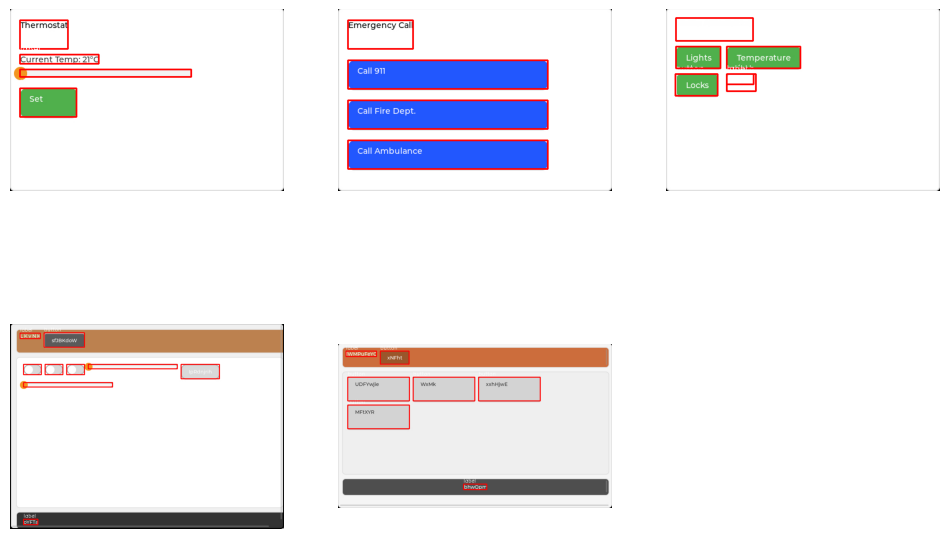

[]


<Figure size 1200x1200 with 0 Axes>

['example.jpg', 'media_playback_example.jpg', 'smart_watch.jpg']
Image path: example.jpg
Annotation path: ./tmp/test/designs/labels/test/example.txt
Image path: media_playback_example.jpg
Annotation path: ./tmp/test/designs/labels/test/media_playback_example.txt
Image path: smart_watch.jpg
Annotation path: ./tmp/test/designs/labels/test/smart_watch.txt


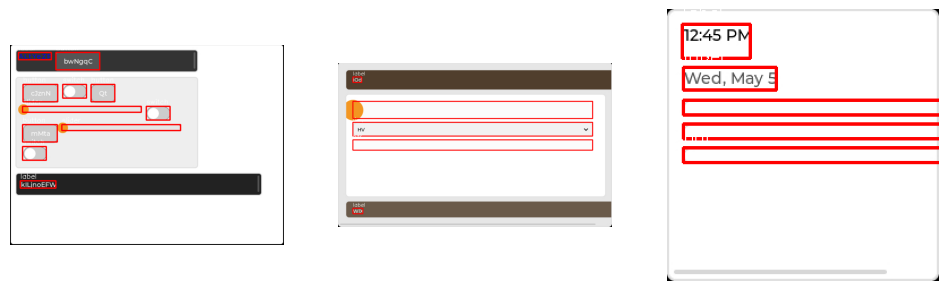

In [98]:
# Show a few images from your dataset
for split in dataset_dirs.keys():
    image_samples = os.listdir(os.path.join(base_path, dataset_config[split]))[:9]  # Load first 9 images
    print(image_samples)
    show_images_with_annotations(dataset_dirs[split]['image'], image_samples, class_names)